In [1]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Separate features and labels
X = df.iloc[:, 2:].values  # Features start from the 3rd column
y = df.iloc[:, 1].values   # Label column

y = np.where(y == 'M', 1, 0)

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

n_splits = 10
scores = []

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

for fold in range(n_splits):
    test_indices = indices[fold::n_splits]
    train_indices = np.setdiff1d(indices, test_indices)
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    svm = SVC(kernel='linear', random_state=1)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

print("SVM 10-Fold CV Scores:", scores)
print("Average Score:", np.mean(scores))


SVM 10-Fold CV Scores: [0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9649122807017544, 0.9298245614035088, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9824561403508771, 0.9642857142857143]
Average Score: 0.950814536340852


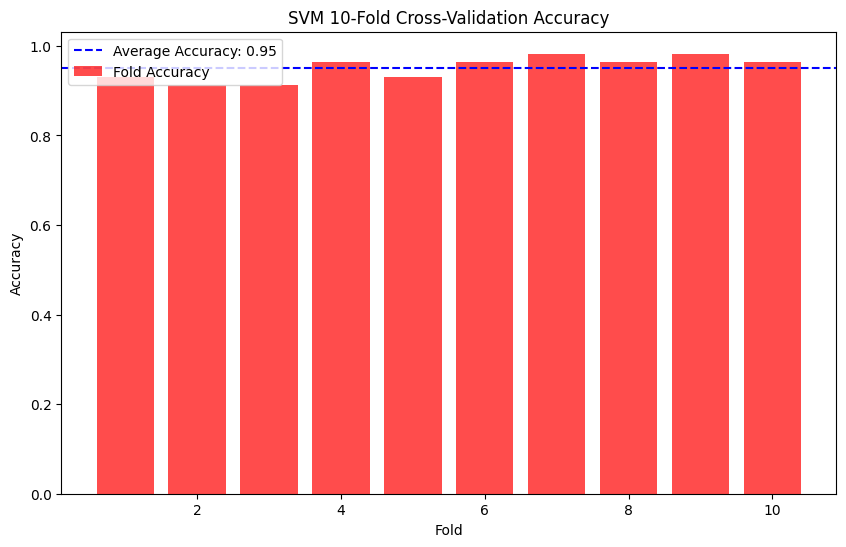

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_splits + 1), scores, alpha=0.7, color='r', label='Fold Accuracy')
plt.axhline(np.mean(scores), color='b', linestyle='--', label=f'Average Accuracy: {np.mean(scores):.2f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('SVM 10-Fold Cross-Validation Accuracy')
plt.legend()
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0]
param_grid = [
    {'logisticregression__C': param_range, 
     'logisticregression__solver': ['liblinear', 'saga']}
]


gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy',  
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs.fit(X_train, y_train)


best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

print("Best C value:", gs.best_params_['logisticregression__C'])
print("Best solver:", gs.best_params_['logisticregression__solver'])


Best C value: 1.0
Best solver: saga


c:\Users\LYJ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


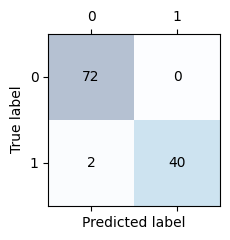

In [7]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


In [8]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

specificity = confmat[0, 0] / (confmat[0, 0] + confmat[0, 1])
print('Specificity: %.3f' % specificity)

Precision: 1.000
Recall: 0.952
F1: 0.976
Specificity: 1.000
